<a href="https://colab.research.google.com/github/jomendietad/SenalesYSistemas/blob/main/Parciales/Parcial%201/Parcial1SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 1: Señales y Sistemas**
##**Johan Sebastian Mendieta Dilbert**

#**Primer Punto:**
##Se tiene un microprocesador de 5 bits con entrada análoga de 3.3 a 5[V]. Diseñe el sistema de acondicionamiento y digitalización para la señal: $x(t) = 20sin\left(7t-\frac{\pi}{2}\right)-3cos(5t)+2cos(10t)$.
##Presente las  simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python incluyendo al menos dos periodos de la señal estudiada.

Se simula la señal original


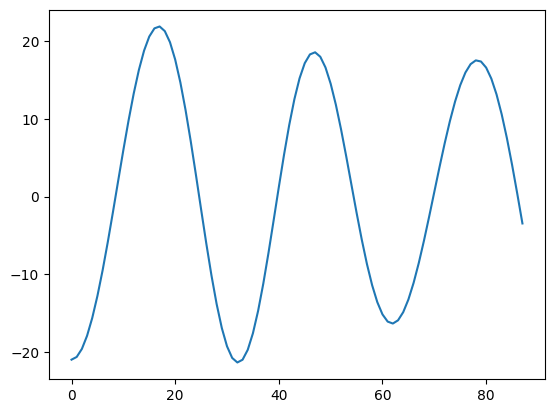

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 25
  xmin = -25 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

#Se definen las amplitudes de las funciones trigonométricas
A1 = 20
A2 = -3
A3 = 2
#Se calculan los periodos, frecuencias y velocidades angulares de cada función trigonométrica
T_1 = (2/7)*np.pi
T_2 = (2/5)*np.pi
T_3 = (2/10)*np.pi
w1=7
w2=5
w3=10
f1=1/T_1
f2=1/T_2
f3=1/T_3
ti = 0 #tiempo inicial
tf = 4*T_3 #tiempo final (Mayor al mayor periodo de las señales que conforman a x(t))
Fs = 35 # Hz (Frecuencia de muestreo que cumple el teorema de Nyquist)
Ts = 1/Fs # Periodo de muestreo
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo (discretizar)
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #Señal de entrada
#cero y pendiente
ymin = -3.3
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #continua
print("Se simula la señal original")

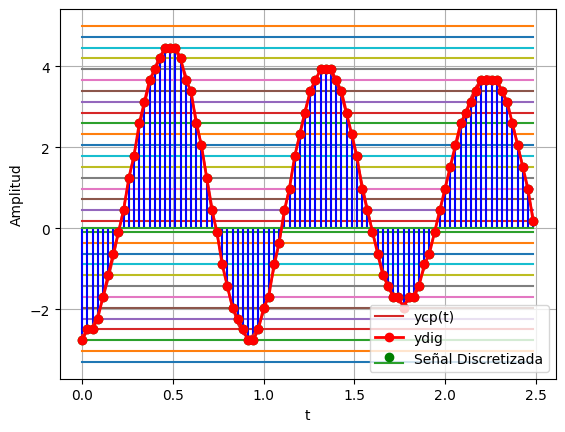

Se simula la señal digitalizada bajo los criterios dados


In [94]:
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="blue", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='r',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Se simula la señal digitalizada bajo los criterios dados")

#**Segundo Punto:**
##Cuál es el señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo $5kHz$, aplicado a la señal $x(t)= 3cos(11000\pi t)$?. Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

Esta es la señal original simulada con una frecuencia alta de muestreo para hacerla 'continua'


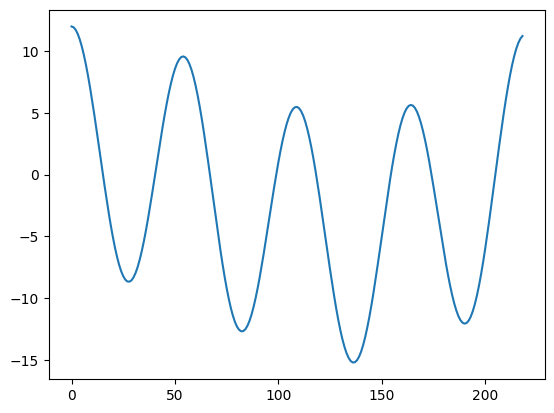

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#Se definen las amplitudes de las funciones trigonométricas
A1 = 3 # amplitud
A2 = 5
A3 = 10
#Se calculan los periodos, frecuencias y velocidades angulares de cada función trigonométrica
T_1 = (1/500)
T_2 = (1/1000)
T_3 = (1/5500)
w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi
f1=1/T_1
f2=1/T_2
f3=1/T_3
ti = 0 #tiempo inicial
tf = 4*T_3 #tiempo final (Mayor al mayor periodo de las señales que conforman a x(t))
Fs = 300000 # Hz (Frecuencia de muestreo que cumple el teorema de Nyquist)
Ts = 1/Fs #Periodo de muestreo
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo (discretizar)
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #Señal de entrada
#cero y pendiente
ymin = -5
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #continua
print("Esta es la señal original simulada con una frecuencia alta de muestreo para hacerla 'continua'")

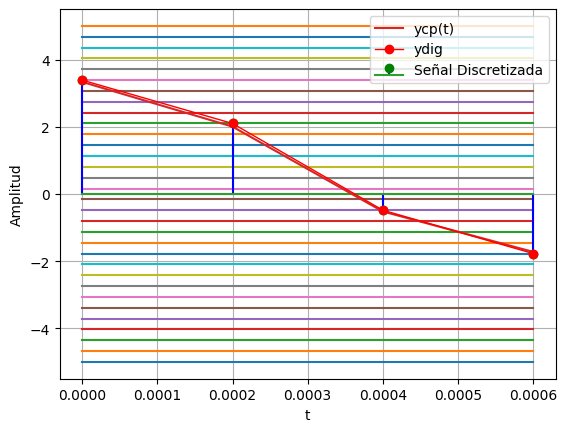

Esta es la señal original digitalizada a una frecuencia de muestreo de 5000 Hz, mostrando que esta señal obtiene un aliasing con ese Fs


In [96]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 18
  xmin = -18 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
Fs = 5000 # Hz
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo (discretizar)
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #vector de datos en amplitud
#cero y pendiente
ymin = -5
ymax = 5
nbits = 5
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)
#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="blue", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='r',marker='o',label='ydig', linewidth=1) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Esta es la señal original digitalizada a una frecuencia de muestreo de 5000 Hz, mostrando que esta señal obtiene un aliasing con ese Fs")

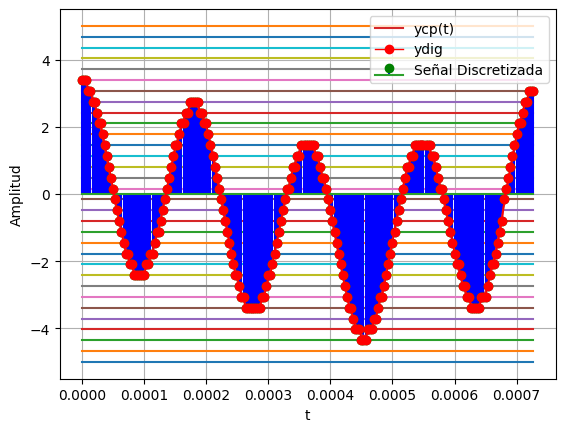

Conclusión:
- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).
- Se implementó un cambio en la frecuencia de muestreo para cumplir el teorema de Nyquist.
- La frecuencia de muestreo de 20 kHz si es adecuada para la componente de 5500 Hz.


In [97]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 18
  xmin = -18 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

A1 = 3 # amplitud
A2 = 5
A3 = 10
T_1 = (1/500)
T_2 = (1/1000)
T_3 = (1/5500)
w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi
f1=1/T_1
f2=1/T_2
f3=1/T_3
ti = 0 #tiempo inicial
tf = 4*T_3 #tiempo final
Fs = 300000 # Hz
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo (discretizar)
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #vector de datos en amplitud
#cero y pendiente
ymin = -5
ymax = 5
nbits = 5
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)
#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="blue", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='r',marker='o',label='ydig', linewidth=1) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Conclusión:")
print("- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).")
print("- Se implementó un cambio en la frecuencia de muestreo para cumplir el teorema de Nyquist.")
print("- La frecuencia de muestreo de 20 kHz si es adecuada para la componente de 5500 Hz.")

#**Tercer Punto:**
##La distancia media entre dos señales $x_1(t), x_2(t) ∈ \mathbb{R} , \mathbb{C}$, se puede expresar a partir de la potencia media:

##$d(x_1,x_2)= \overline{P}_\left(x_1-x_2\right)= \lim\limits_{T \to ∞} \frac{1}{T} \int_T|x_1(t)-x_2(t)|^2dt$

##$x_1(t)=A\text{cos}\left(ω_0t\right), ω_0=\frac{2π}{T}, T, A ∈ \mathbb{R}^+$

##$
x_2(t) = \begin{cases}
1, & \text{si } 0 \leq t < \frac{T}{4} \\
-1, & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1, & \text{si } \frac{3T}{4} \leq t < T
\end{cases}
$

##¿Cuál es la distancia media entre las señales?. Corrobore sus desarrollos con Sympy.

In [98]:
import sympy as sym

# Definición de variables simbólicas (Amplitud, tiempo y periodo)
A, t, T = sym.symbols('A t T', real=True, positive=True)
w0 = 2 * sym.pi / T

# Definición de las señales
x1 = A*sym.cos(w0 * t)
# Definición por partes de x2
x2 = sym.Piecewise((1, (t >= 0) & (t < T/4)), (-1, (t >= T/4) & (t < 3*T/4)), (1, (t >= 3*T/4) & (t < T)))
# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo (debido a la definición de x2) y suma total
integral = sym.integrate(f, (t, 0, T/4)) + sym.integrate(f, (t, T/4, 3*T/4)) + sym.integrate(f, (t, 3*T/4, T))

# Resultado de la potencia media (sin simplificar)
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sym.simplify(distancia_media)
print("La distancia media entre las señales es: ")
distancia_media_simplificada

La distancia media entre las señales es: 


A**2/2 - 4*A/pi + 1

#**Cuarto Punto:**
##Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t$ ∈ [$t_i,t_f$]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$c_n=\frac{1}{(t_i-t_f)n^2ω_0^2}\int_{t_i}^{t_f}x''(t)e^{-jnω_0t}dt; n ∈ \mathbb{Z}$$

##¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?.

##Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0, ±1, ±2, ±3, ±4, ±5}$, a partir de $x''(t)$ para la señal en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

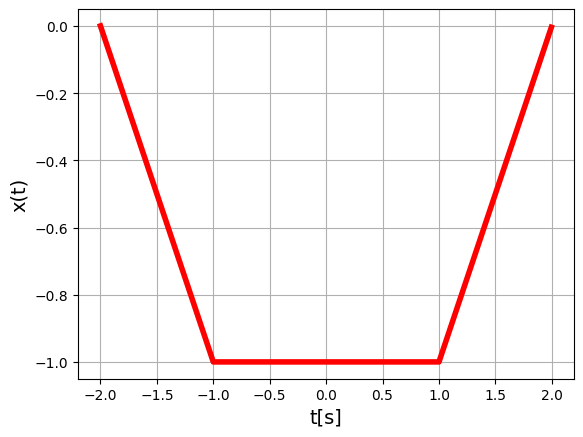

<ipython-input-99-6ae073f10fdd>:50: RuntimeWarning: invalid value encountered in divide
  Cn = -(2*(np.cos(nv*np.pi/2)-np.cos(nv*np.pi)))/((np.pi**2)*(nv**2)) #Valores de Cn calculados para los valores de A, d1, d2


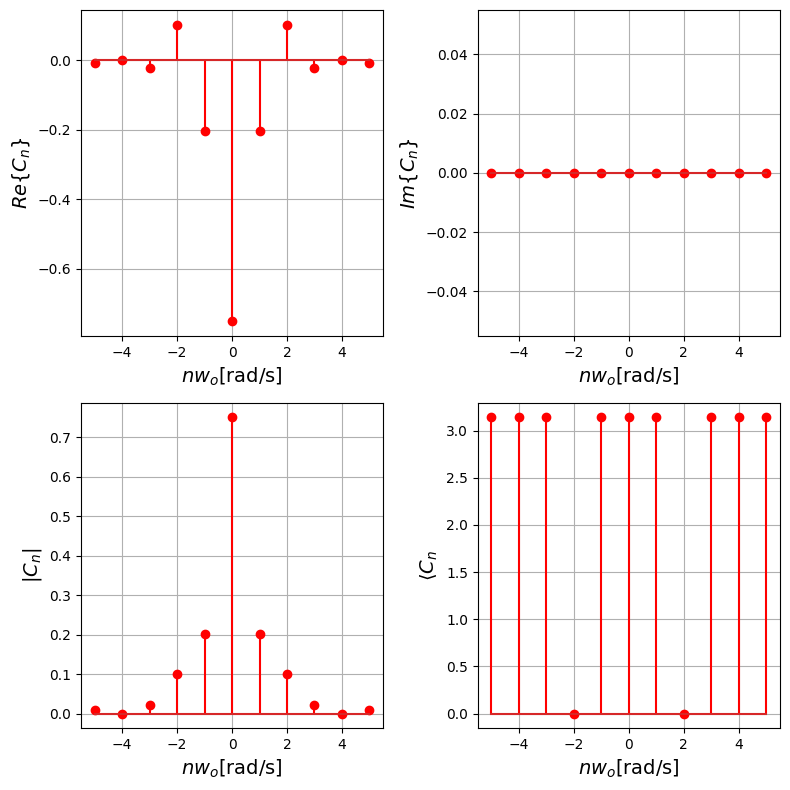

In [99]:
from ipywidgets import interact,IntSlider
import numpy as np
import matplotlib.pyplot as plt
#Definición de las variables de la señal para la simulación
A=1
d2=2
d1=1
T = 2*d2 # Tiempo de la gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida lo suficientemente alta
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
#Se hace uso de la definición de una función trapecio positiva de amplitud 1 y luego se invierte su signo para trabajarla con el ejercicio dado
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Un array de valores en el eje x.
    - a: Inicio de la pendiente descendente.
    - b: Inicio de la meseta (valores bajos constantes).
    - c: Fin de la meseta (valores bajos constantes).
    - d: Fin de la pendiente ascendente.

    Retorna:
    - Un array con los valores de la función trapezoidal en cada punto x.
    """
    positive_trap = np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))
    return -positive_trap

# Se define la función trapecio del punto con su amplitud
x = A*funcion_trapecio(tv, -d2, -d1, d1, d2)
#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
# Cálculo de Cn (para n diferente de 0)
Cn = -(2*(np.cos(nv*np.pi/2)-np.cos(nv*np.pi)))/((np.pi**2)*(nv**2)) #Valores de Cn calculados para los valores de A, d1, d2
#Valor DC (C0)
Cn[N] = -3/4
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [100]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>

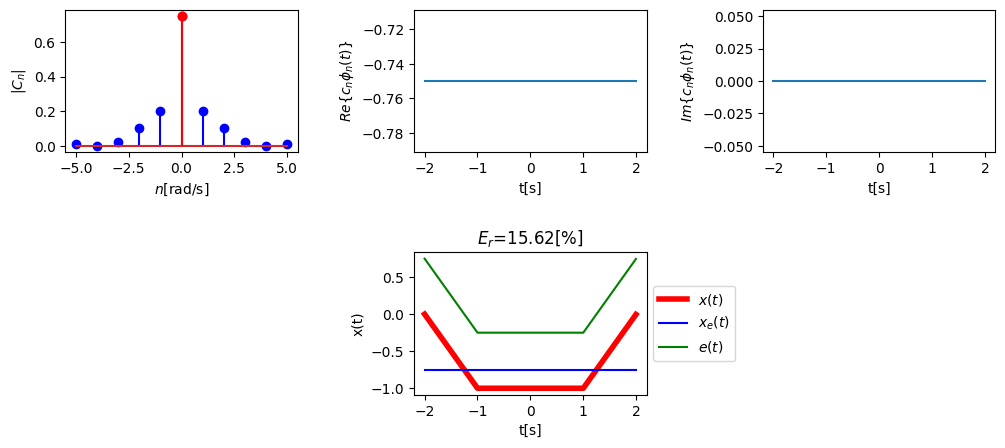

In [101]:
from matplotlib import animation, rc
from IPython.display import HTML
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()
    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$n$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')
    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')
    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')
    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe
    ax[1,1].plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()
#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [102]:
anim

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>